# Prediction of H1N1 and Seasonal Flu Vaccine

1. Introduction

2. Problem Statement

3. Main Objective

4. Metric for Success

5. Experimental Design

6. Data Description


# Reading the Data

In [368]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [369]:
## importing the dataset and # printing few rows
feature_data = pd.read_csv("H1N1_Flu_Vaccines.csv", index_col=0)
feature_data.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  rent_or_own   employment_status  \
respondent_id                    ...                                    
0                           0.0  ...          Own  Not in Labor Force   
1                           0.0  ...         Rent            Employed   
2                           NaN  ...          Own            Employed   
3                           0.0  ...         Rent  Not in Labor Force   
4                           0.0  ...          Own            Employed   

               hhs_geo_region                census_msa  household_adults  \
respondent_id                                                               
0                    oxchjgsf                   Non-MSA               0.0   
1                    bhuqouqj  MSA, Not Principle  City               0.0   
2                    qufhixun  MSA, Not Principle  City               2.0   
3                    lrircsnp       MSA, Principle City               0.0   
4                    qufhixun  MSA, Not Principle  City               1.0   

               household_children  employment_industry  employment_occupation  \
respondent_id                                                                   
0                             0.0                  NaN                    NaN   
1                             0.0             pxcmvdjn               xgwztkwe   
2                             0.0             rucpziij               xtkaffoo   
3                             0.0                  NaN                    NaN   
4                             0.0             wxleyezf               emcorrxb   

               h1n1_vaccine  seasonal_vaccine  
respondent_id                                  
0                         0                 0  
1                         0                 1  
2                         0                 0  
3                         0                 1  
4                         0                 0  

[5 rows x 37 columns]

In [269]:
#Inspecting the shape of the dataframe
feature_data.shape

(26707, 37)

In [270]:
# Checking for the inferential statistics of the dataframe
feature_data.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

In [370]:
#Checking for the basic information of our data
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [389]:
# checking for null values percentage in the data
missing = (feature_data.isna().sum()).to_frame().sort_values(0,ascending = False)
print('missing_data:',missing.sum())
missing


missing_data: 0    60762
dtype: int64


0
employment_occupation        13470
employment_industry          13330
health_insurance             12274
income_poverty                4423
doctor_recc_h1n1              2160
doctor_recc_seasonal          2160
rent_or_own                   2042
employment_status             1463
marital_status                1408
education                     1407
chronic_med_condition          971
child_under_6_months           820
health_worker                  804
opinion_seas_sick_from_vacc    537
opinion_seas_risk              514
opinion_seas_vacc_effective    462
opinion_h1n1_sick_from_vacc    395
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
household_adults               249
household_children             249
behavioral_avoidance           208
behavioral_touch_face          128
h1n1_knowledge                 116
h1n1_concern                    92
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_antiviral_meds       71
behavioral_wash_hands           42
behavioral_face_mask            19
sex                              0
race                             0
age_group                        0
hhs_geo_region                   0
census_msa                       0
h1n1_vaccine                     0
seasonal_vaccine                 0

*Observation:* 

* There is `60762 missing data` in our dataset that i will deal with to being harmony to the consistency of the data.

In [392]:
# Checking for duplicated values in our dataset
print("Duplicated values:", feature_data.duplicated().sum())

Duplicated values: 0


*Observation:*

* Theres are no `duplicated values` in our dataset.

In [394]:
# Printing the column names
print(feature_data.columns)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')


# 2. <span style ='color : cyan'> DATA CLEANING </SPAN>


# `Handling Missing Values`
    
* For handling the missing, the features were split into two categories: `Categorical and Numerical Variables` for easier       analysis and data cleaning.

`a. Dealing with Missing Values that are numerical columns`

  * For the missing values in this columns, I will use the `SimpleImputer function` and replace the `missing values` with the `most frequent` values.

In [275]:
# Creating separate variable for numerical and removing null values 
df_num = feature_data.select_dtypes(exclude = 'object')
df_num.head()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
respondent_id                                                            
0                       1.0             0.0                        0.0   
1                       3.0             2.0                        0.0   
2                       1.0             1.0                        0.0   
3                       1.0             1.0                        0.0   
4                       2.0             1.0                        0.0   

               behavioral_avoidance  behavioral_face_mask  \
respondent_id                                               
0                               0.0                   0.0   
1                               1.0                   0.0   
2                               1.0                   0.0   
3                               1.0                   0.0   
4                               1.0                   0.0   

               behavioral_wash_hands  behavioral_large_gatherings  \
respondent_id                                                       
0                                0.0                          0.0   
1                                1.0                          0.0   
2                                0.0                          0.0   
3                                1.0                          1.0   
4                                1.0                          1.0   

               behavioral_outside_home  behavioral_touch_face  \
respondent_id                                                   
0                                  1.0                    1.0   
1                                  1.0                    1.0   
2                                  0.0                    0.0   
3                                  0.0                    0.0   
4                                  0.0                    1.0   

               doctor_recc_h1n1  ...  opinion_h1n1_vacc_effective  \
respondent_id                    ...                                
0                           0.0  ...                          3.0   
1                           0.0  ...                          5.0   
2                           NaN  ...                          3.0   
3                           0.0  ...                          3.0   
4                           0.0  ...                          3.0   

               opinion_h1n1_risk  opinion_h1n1_sick_from_vacc  \
respondent_id                                                   
0                            1.0                          2.0   
1                            4.0                          4.0   
2                            1.0                          1.0   
3                            3.0                          5.0   
4                            3.0                          2.0   

               opinion_seas_vacc_effective  opinion_seas_risk  \
respondent_id                                                   
0                                      2.0                1.0   
1                                      4.0                2.0   
2                                      4.0                1.0   
3                                      5.0                4.0   
4                                      3.0                1.0   

               opinion_seas_sick_from_vacc  household_adults  \
respondent_id                                                  
0                                      2.0               0.0   
1                                      4.0               0.0   
2                                      2.0               2.0   
3                                      1.0               0.0   
4                                      4.0               1.0   

               household_children  h1n1_vaccine  seasonal_vaccine  
respondent_id                                                      
0                             0.0             0                 0  
1                             0.0             0                 1  
2          

In [397]:
#using simple imputer for replacing null values with the most frequent values

# Instantiating the SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')
# # Fitting and transforming
df_num.iloc[:,:] = imputer.fit_transform(df_num)

#Checking if the null values have been dealt with
df_num.isna().sum()
# Checking the shape to confirm the number of columns in the df_num variable
df_num.shape

(26707, 25)

`b. Dealing with Missing Values that are Categorical columns`

  * For the missing values in this columns, I will also use the `SimpleImputer function` and replace the `missing values` with the `most frequent` values.

In [277]:
## Creating separate variable for Categorical columns and removing null values 
categorical_num = feature_data.select_dtypes(include = 'object')
categorical_num.head()


age_group         education   race     sex  \
respondent_id                                                   
0              55 - 64 Years        < 12 Years  White  Female   
1              35 - 44 Years          12 Years  White    Male   
2              18 - 34 Years  College Graduate  White    Male   
3                  65+ Years          12 Years  White  Female   
4              45 - 54 Years      Some College  White  Female   

                          income_poverty marital_status rent_or_own  \
respondent_id                                                         
0                          Below Poverty    Not Married         Own   
1                          Below Poverty    Not Married        Rent   
2              <= $75,000, Above Poverty    Not Married         Own   
3                          Below Poverty    Not Married        Rent   
4              <= $75,000, Above Poverty        Married         Own   

                employment_status hhs_geo_region                census_msa  \
respondent_id                                                                
0              Not in Labor Force       oxchjgsf                   Non-MSA   
1                        Employed       bhuqouqj  MSA, Not Principle  City   
2                        Employed       qufhixun  MSA, Not Principle  City   
3              Not in Labor Force       lrircsnp       MSA, Principle City   
4                        Employed       qufhixun  MSA, Not Principle  City   

              employment_industry employment_occupation  
respondent_id                                            
0                             NaN                   NaN  
1                        pxcmvdjn              xgwztkwe  
2                        rucpziij              xtkaffoo  
3                             NaN                   NaN  
4                        wxleyezf              emcorrxb

In [398]:
# using simple imputer for replacing null values with most frequent

# Instantiating the SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,strategy='most_frequent')

# Fitting and transforming
categorical_num.iloc[:,:] = imputer.fit_transform(categorical_num)

# Checking if the null values have been dealt with
categorical_num.isna().sum()
# Checking the shape to confirm the number of columns in the catergorical variable
categorical_num.shape

(26707, 12)

### `Encoding the Categorical Data`

In [400]:
# Using the the Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

# Instantating the OrdinalEncoder Function
encoder = OrdinalEncoder(categories='auto')

# Fitting and Transforming
X_encoded = encoder.fit_transform(categorical_num)
# # Convert the encoded values into a DataFrame
X_encoded_df = pd.DataFrame(X_encoded)
#  Set the column names of the DataFrame to match the original categorical variables
X_encoded_df.columns = categorical_num.columns
# The encoded DataFrame is now stored in X_encoded_df
X_encoded_df

age_group  education  race  sex  income_poverty  marital_status  \
0            3.0        1.0   3.0  0.0             2.0             1.0   
1            1.0        0.0   3.0  1.0             2.0             1.0   
2            0.0        2.0   3.0  1.0             0.0             1.0   
3            4.0        0.0   3.0  0.0             2.0             1.0   
4            2.0        3.0   3.0  0.0             0.0             0.0   
...          ...        ...   ...  ...             ...             ...   
26702        4.0        3.0   3.0  0.0             0.0             1.0   
26703        0.0        2.0   3.0  1.0             0.0             1.0   
26704        3.0        3.0   3.0  0.0             0.0             1.0   
26705        0.0        3.0   1.0  0.0             0.0             0.0   
26706        4.0        3.0   3.0  1.0             0.0             0.0   

       rent_or_own  employment_status  hhs_geo_region  census_msa  \
0              0.0                1.0             8.0         2.0   
1              1.0                0.0             1.0         0.0   
2              0.0                0.0             9.0         0.0   
3              1.0                1.0             5.0         1.0   
4              0.0                0.0             9.0         0.0   
...            ...                ...             ...         ...   
26702          0.0                1.0             9.0         2.0   
26703          1.0                0.0             6.0         1.0   
26704          0.0                0.0             6.0         0.0   
26705          1.0                0.0             5.0         2.0   
26706          0.0                1.0             7.0         1.0   

       employment_industry  employment_occupation  
0                      4.0                   21.0  
1                     12.0                   19.0  
2                     14.0                   21.0  
3                      4.0                   21.0  
4                     18.0                    5.0  
...                    ...                    ...  
26702                  4.0                   21.0  
26703                  4.0                    2.0  
26704                  4.0                   21.0  
26705                  4.0                    6.0  
26706                  4.0                   21.0  

[26707 rows x 12 columns]

### `Concantinating the numerical and Catergorical data for further processing`

In [280]:
# Concantinated the numerical and categorical data into one dataframe
feature_data1 = pd.concat([df_num,X_encoded_df], axis=1)
feature_data1.head()


h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   
2           1.0             1.0                        0.0   
3           1.0             1.0                        0.0   
4           2.0             1.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   
2                   1.0                   0.0                    0.0   
3                   1.0                   0.0                    1.0   
4                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   
2                          0.0                      0.0   
3                          1.0                      0.0   
4                          1.0                      0.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  race  sex  income_poverty  \
0                    1.0               0.0  ...   3.0  0.0             2.0   
1                    1.0               0.0  ...   3.0  1.0             2.0   
2                    0.0               0.0  ...   3.0  1.0             0.0   
3                    0.0               0.0  ...   3.0  0.0             2.0   
4                    1.0               0.0  ...   3.0  0.0             0.0   

   marital_status  rent_or_own  employment_status  hhs_geo_region  census_msa  \
0             1.0          0.0                1.0             8.0         2.0   
1             1.0          1.0                0.0             1.0         0.0   
2             1.0          0.0                0.0             9.0         0.0   
3             1.0          1.0                1.0             5.0         1.0   
4             0.0          0.0                0.0             9.0         0.0   

   employment_industry  employment_occupation  
0                  4.0                   21.0  
1                 12.0                   19.0  
2                 14.0                   21.0  
3                  4.0                   21.0  
4                 18.0                    5.0  

[5 rows x 37 columns]

In [403]:
print('Hello World')

Hello World


#  <span style ='color : cyan'> 3. <u>Exploratory Data Analysis (EDA) </SPAN>


## 3.1: <u> `Univariate Analysis`


##### `a. Checking whether the data is balanced or not in the Seasonal_Vaccine Feature and H1N1 Feature.`

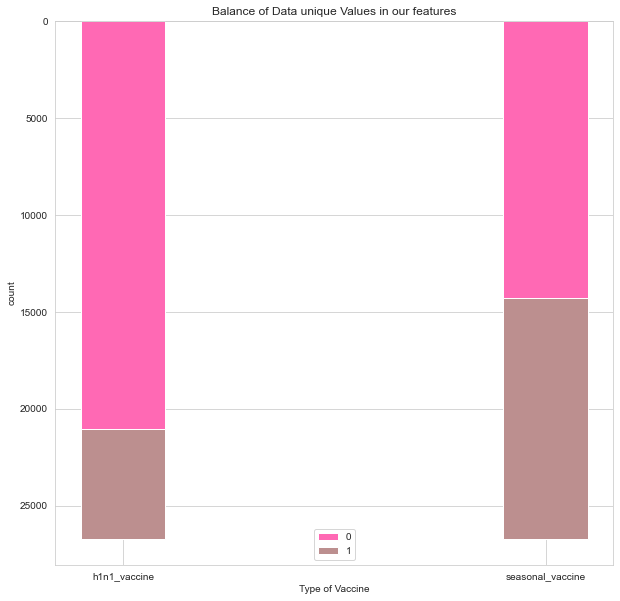

In [416]:
balanced_not = ['h1n1_vaccine', 'seasonal_vaccine']

fig, axes = plt.subplots(figsize=(10, 10))

zero = [feature_data1.h1n1_vaccine.value_counts()[0],feature_data1.seasonal_vaccine.value_counts()[0]]
one= [feature_data1.h1n1_vaccine.value_counts()[1], feature_data1.seasonal_vaccine.value_counts()[1]]

plt.bar(balanced_not,zero,0.2, label= '0', color = 'hotpink')
plt.bar(balanced_not,one,0.2, bottom=zero, label= '1', color ='rosybrown')
plt.legend()
plt.gca().invert_yaxis()

plt.xlabel('Type of Vaccine')
plt.ylabel('count')
plt.title("Balance of Data unique Values in our features")
plt.show()

`Observation`:

* From the above diagram, we can clearly say that the H1N1 vaccine data is very imbalanced as compared to the seasonal vaccine data.
      
* There, the seasonal vaccine data will be used for exploration and modeling.



### b. `Exploration of the distribution of some of the features in our dataset.`

1.<u> `Uptake of the H1N1 Vaccine using the Sex Feature.`

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='count'>

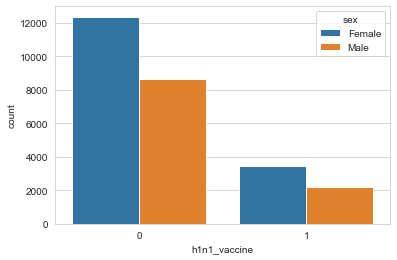

In [285]:
## Lets see how many people have taken the vaccine 

sns.countplot(x='h1n1_vaccine',hue='sex',data=feature_data)

2. <u> `Uptake of the Seasonal Vaccine using the Sex Feature.`

<AxesSubplot:xlabel='seasonal_vaccine', ylabel='count'>

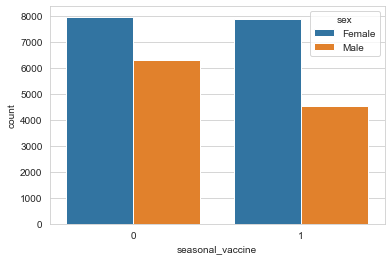

In [286]:
sns.countplot(x='seasonal_vaccine',hue='sex',data=feature_data)

Observations:

* From the above figure, we there is a higher uptake of `Seasonal Vaccine` as compared to the `H1N1 Vaccine.`

* We can also observe that more females have a higher uptake of both the seasonal and H1N1 vaccine as compared to the men.


 3. <u> `Plotting Distribution of some key features.`

* In the below graph, I wanted to have a general observation/analysis of the the representation of the different subgroups in the data set.

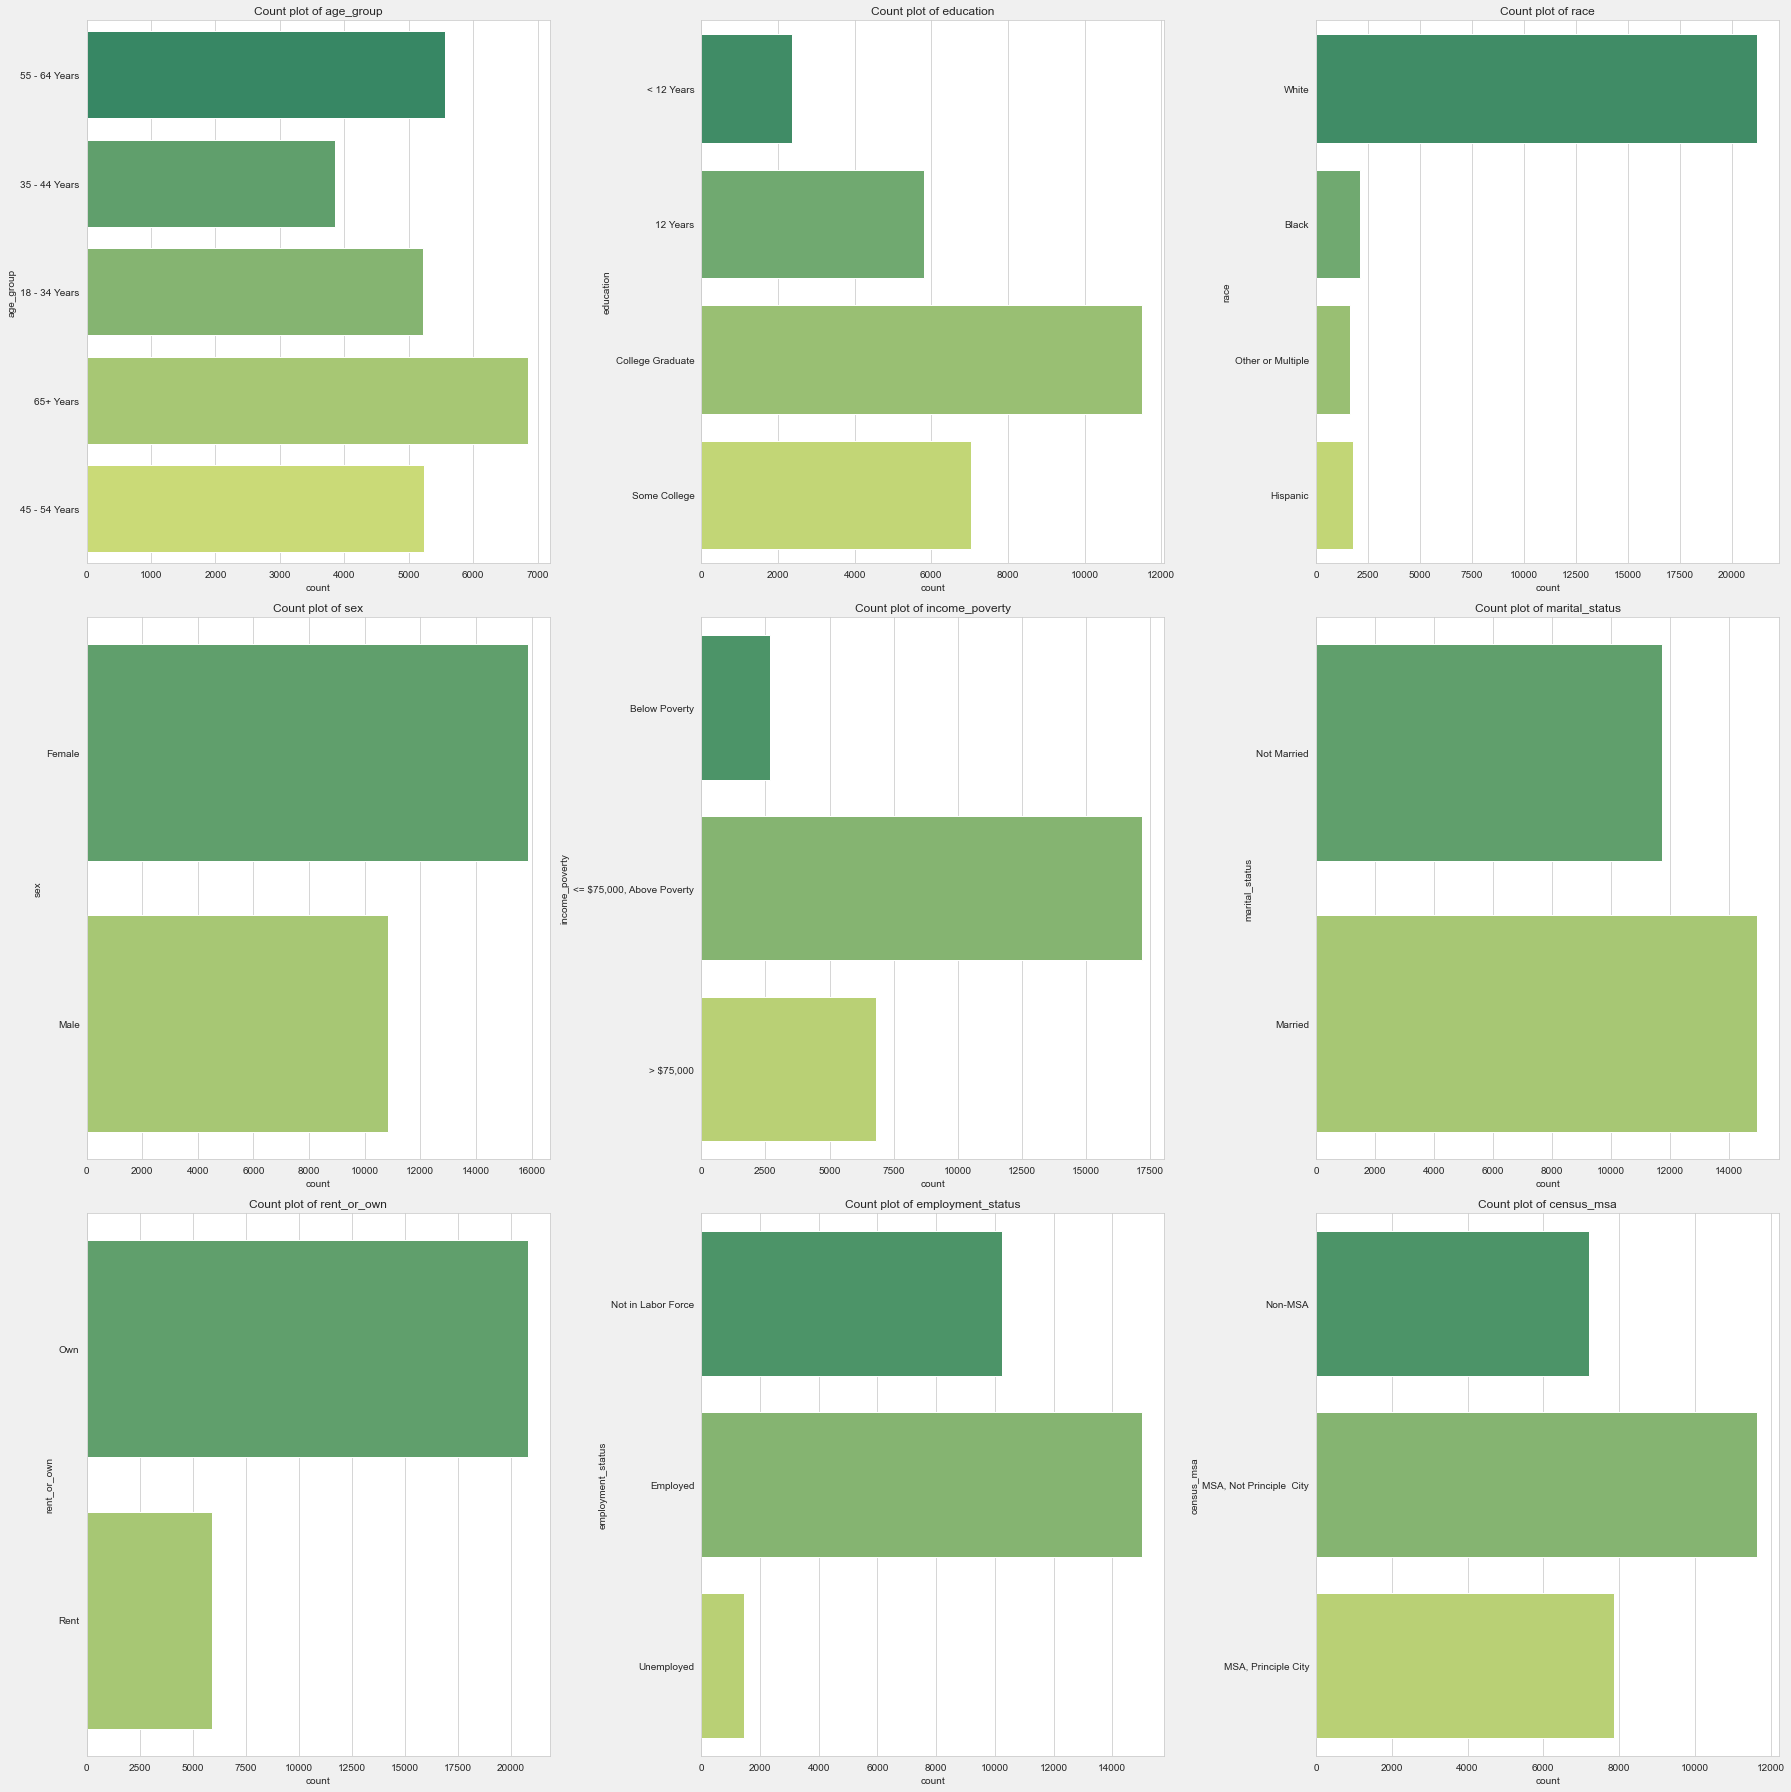

In [417]:
# Drop the specified columns from the categorical_num DataFrame
data_cat = categorical_num.drop(['employment_industry', 'employment_occupation', 'hhs_geo_region'], axis=1)

# Get the column names for plotting
count_plot = data_cat.columns

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3 , ncols=3, figsize=(25, 25))
fig.patch.set_facecolor('#F0F0F0')

# Iterate over the columns and corresponding axes
for column, ax in zip(count_plot, axes.flatten()):
    # Plot countplot for each column
    sns.countplot(data=data_cat, y=column, ax=ax, palette="summer")
    ax.set_title(f'Count plot of {column}')

# Adjust subplot spacing and display the plot
plt.tight_layout()
plt.show()


`Observations:`
* Majority of the respondents are above 65 years of age though variance between the groups is quite low.

* Almost 60% of the respondents are female.

* Most of the respondents are college graduates

* The white race is highly dominate in our dataset

* Close to 60% of the respondents earn between the poverty line and around $75,000 annually.

* Most of the respondents represented are employed.

* Majority of the respondents are property owners.

* The married population is highly represented in our dataset.



## 3.2: <u> `Multivariate Analysis`

1. <u> `Uptake of Seasonal Vaccine Against the specific features.`

* Here, I used violin plots to represent the relationship.

In [288]:
#Importing the necessary modules to plot violins for visualization
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots with titles
fig = make_subplots(rows=3, cols=3, subplot_titles=('Race', 'Sex', 'Education', 'Age Group', 'Marital Status', 'HHS Geo Region', 'Health Worker', 'Health Insurance'))

# Define variables and titles
variables = ['race', 'sex', 'education', 'age_group', 'marital_status', 'hhs_geo_region', 'health_worker', 'health_insurance']
titles = ['Race', 'Sex', 'Education', 'Age Group', 'Marital Status', 'HHS Geo Region', 'Health Worker', 'Health Insurance']

# Loop through the variables and add violin plots to the subplots
for i, var in enumerate(variables):
    row = (i // 3) + 1
    col = (i % 3) + 1
    fig.add_trace(go.Violin(x=feature_data[var], y=feature_data['seasonal_vaccine'], name=titles[i]), row=row, col=col)

# Update the layout
fig.update_layout(height=1000, width=900, title_text="Violin Subplots", template="simple_white")

# Show the figure
fig.show()

`Observations:`

*
*
*





#### 2. <u> `Relationship between H1N1 and Seasonal vaccine uptake`

*`What is the relationship between concern about H1N1 and vaccine uptake?`*

* It can be expected that the more the concern about catching H1N1, the more the respondents are likely to take either the
 
  seasonal flu vaccine or the H1N1 vaccine. Plotting this in a bar graph:

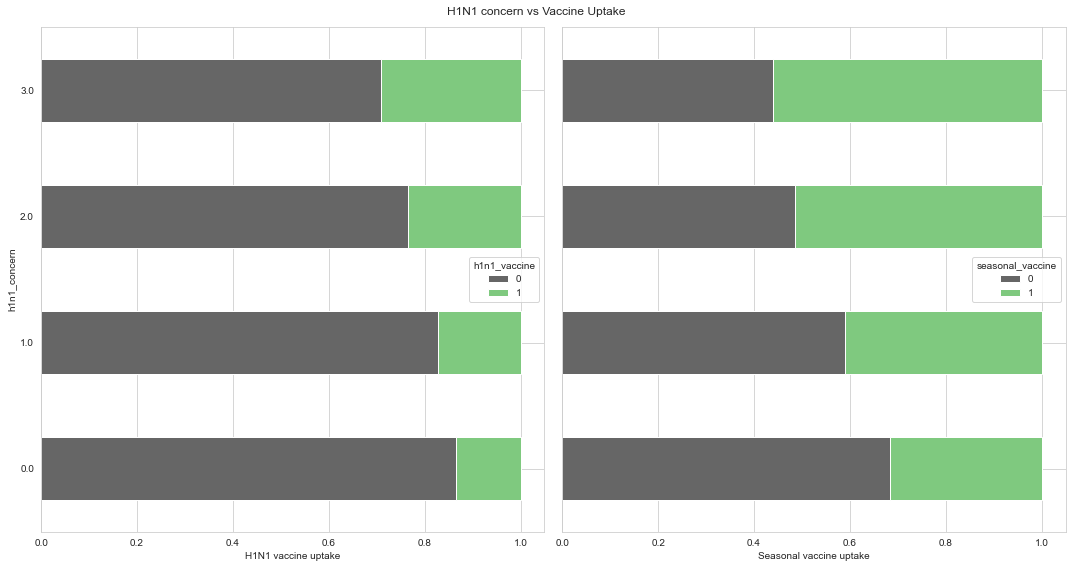

In [289]:
my_cmap = sns.color_palette("Accent_r",as_cmap=True)
fig,(ax_1,ax_2) = plt.subplots(figsize = (15,8),ncols = 2,sharey = True)

crosstab_concern1 = pd.crosstab(feature_data["h1n1_concern"],feature_data['h1n1_vaccine'],normalize="index")
crosstab_concern1.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_1)
crosstab_concern2 = pd.crosstab(feature_data["h1n1_concern"],feature_data['seasonal_vaccine'],normalize="index")
crosstab_concern2.plot(kind = "barh",stacked = True,colormap=my_cmap,ax = ax_2)
ax_1.set_xlabel("H1N1 vaccine uptake")
ax_2.set_xlabel("Seasonal vaccine uptake")

fig.suptitle("H1N1 concern vs Vaccine Uptake")
fig.tight_layout()

`Observation:`

* From this graph, the higher the concern about being sick, the higher the likelihood of taking the vaccine. Uptake of seasonal flu vaccine is noticeably higher in all categories. There could be some hesitance in taking the H1N1 vaccine.

#### `3. Age Group Analysis with Marital Status`

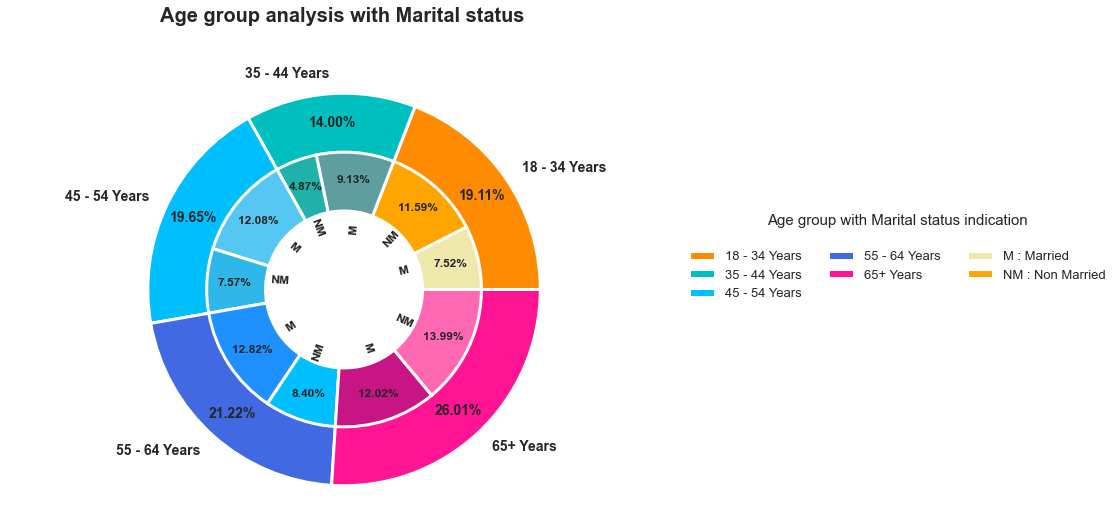

In [290]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Marital status\n\n",fontsize=20,fontweight="bold")
plt.pie([4835,3543,4971,5369,6581], radius=1,
        colors=['darkorange', 'c','deepskyblue','royalblue',"deeppink"],
        labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'], 
        autopct='%.2f%%',
        pctdistance=0.85, textprops = {"fontsize":14,"fontweight":"bold"},
        wedgeprops=dict(width=0.6, edgecolor='white',linewidth=3))

plt.pie([1902,2933,2311,1232,3057,1914,3243,2126,3042,3539], radius=0.7,
        colors=['palegoldenrod','orange', 'cadetblue', 'lightseagreen',
                '#56C7F2','#30B7EA','dodgerblue', 'deepskyblue',"mediumvioletred","hotpink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":12,"fontweight":"bold"},
         labels=['M','NM','M','NM','M','NM','M',
                 'NM','M','NM'],autopct='%.2f%%',
        pctdistance=0.8, labeldistance=0.4,rotatelabels=True )

legend = plt.legend(bbox_to_anchor=(1, 0.7),
          labels=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years',
                  "M : Married","NM : Non Married"],
          title = "Age group with Marital status indication\n",
          ncol=3,
          fontsize=13)
legend.set_title("Age group with Marital status indication\n",prop={"size":15})
legend.draw_frame(False)

# Set the desired background color
background_color = 'white'

# Set the style with the desired background color
sns.set_style("whitegrid", {'axes.facecolor': background_color})

plt.axis('equal')
plt.show()

Observation:


- In 65+ Years age group ,14% are non married people while 12 % are m,arried people

- In 55-64% age group, 12.82 % are married people while 8.40% are non married people

- Total number of married people in dataset is 53.58%while non married people are 42.42%

#### `4. Age Group Analysis with Housing Situation`

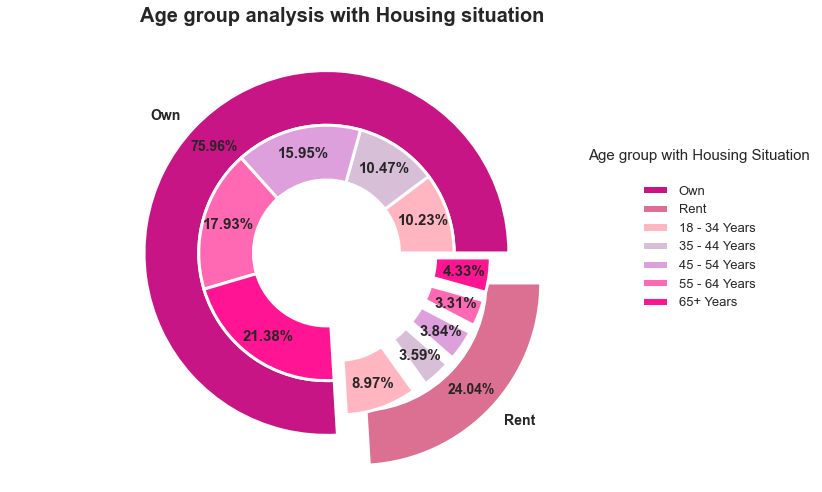

In [291]:
plt.figure(figsize=(12,8))
plt.title("Age group analysis with Housing situation\n",fontsize=20,fontweight="bold")


plt.pie([18736,5929], radius=1,
        colors=["mediumvioletred","palevioletred"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":14,"fontweight":"bold"},
         labels=["Own","Rent"],autopct='%.2f%%',explode = [0,0.24],
        pctdistance=0.85, labeldistance=1.1, )

plt.pie([2524,2582,3933,4423,5274,2212,885,947,816,1069], radius=0.7,
        colors=["lightpink","thistle","plum","hotpink","deeppink"],
        wedgeprops=dict(width=0.3, edgecolor='w',linewidth=3),textprops = {"fontsize":15,"fontweight":"bold"},
         autopct='%.2f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,0.2],
        pctdistance=0.8, labeldistance=0.4, )

legend = plt.legend(bbox_to_anchor=(0.85, 0.8),
          labels=['Own','Rent','18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'],
          fontsize=13)
legend.set_title("Age group with Housing Situation\n",prop={"size":15})
legend.draw_frame(False)

plt.axis('equal')
plt.show()

Observation:

* In given dataset, 75.96% are Own housing people while 24.014% are rent housing people.

* In Own housing people, 21.38% people are belongs from 65+ year age group which is high in number while 10.23% people are belongs from 18-34 years age group which is least in number

* In Rent housing people, 8.97% people are belongs from 18-34 years age group which is high in number while 3.31% people

# FEATURE SELECTION

In [293]:
# Importing necessary modules for feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Set the Target and Independent variable

X = feature_data1.drop(['h1n1_vaccine', 'seasonal_vaccine'], axis=1) # Independent Variable
y = feature_data1.seasonal_vaccine # Target Variable

# Apply select K best to extract best features 
best_features = SelectKBest(chi2,k=15)
fit = best_features.fit(X, y)

scores = pd.DataFrame(fit.scores_)
x_columns= pd.DataFrame(X.columns)

feature_score = pd.concat([x_columns,scores], axis=1)
feature_score.columns =['feature_data1','scores']
feature_score.head(15)



feature_data1       scores
0                  h1n1_concern   325.148276
1                h1n1_knowledge   115.652237
2     behavioral_antiviral_meds     0.918545
3          behavioral_avoidance    42.141343
4          behavioral_face_mask    62.214095
5         behavioral_wash_hands    58.594846
6   behavioral_large_gatherings    69.677957
7       behavioral_outside_home    50.332544
8         behavioral_touch_face   123.369866
9              doctor_recc_h1n1   839.733852
10         doctor_recc_seasonal  2421.579654
11        chronic_med_condition   557.625394
12         child_under_6_months     4.427147
13                health_worker   383.862558
14             health_insurance    27.094311

In [294]:
# Final features for modelling
print(feature_score.nlargest(15, 'scores'))

                  feature_data1       scores
19            opinion_seas_risk  2794.888237
10         doctor_recc_seasonal  2421.579654
23                    age_group  1997.217625
33          employment_industry  1669.849661
18  opinion_seas_vacc_effective   991.273021
16            opinion_h1n1_risk   866.169464
9              doctor_recc_h1n1   839.733852
11        chronic_med_condition   557.625394
22           household_children   538.442999
13                health_worker   383.862558
0                  h1n1_concern   325.148276
15  opinion_h1n1_vacc_effective   286.280388
29                  rent_or_own   215.311327
8         behavioral_touch_face   123.369866
1                h1n1_knowledge   115.652237


* ###  Confirming the above results using the .corr() Function

In [295]:
feature_corr = feature_data1.corr()['seasonal_vaccine'].sort_values(ascending=False)
filter_corr = feature_corr[(feature_corr > 0.1)]
filter_corr

seasonal_vaccine               1.000000
opinion_seas_risk              0.386916
h1n1_vaccine                   0.377143
doctor_recc_seasonal           0.360696
opinion_seas_vacc_effective    0.358869
age_group                      0.277454
opinion_h1n1_risk              0.215650
opinion_h1n1_vacc_effective    0.203187
doctor_recc_h1n1               0.198560
chronic_med_condition          0.169465
h1n1_concern                   0.154488
health_worker                  0.126977
health_insurance               0.124929
behavioral_touch_face          0.119925
h1n1_knowledge                 0.119779
behavioral_wash_hands          0.112254
race                           0.101743
Name: seasonal_vaccine, dtype: float64

In [296]:
# Here we will use the feature_data1 that I earlier encoded
final_df=feature_data1.loc[:,['opinion_seas_risk', 'doctor_recc_seasonal', 'age_group','employment_industry', 'opinion_seas_vacc_effective',
                   'opinion_h1n1_risk', 'doctor_recc_h1n1', 'chronic_med_condition', 'household_children',
                   'health_worker', 'h1n1_concern', 'opinion_h1n1_vacc_effective', 'rent_or_own',
                   'behavioral_wash_hands','behavioral_touch_face', 'seasonal_vaccine']]
final_df.shape

(26707, 16)

# `Modelling`

* For modelling, I decided to pick the following for modelling:

   1. Decison Tree (Base Model)

   2. Random Forest 

   3. AdaBoost

   4. Gradient Boosting

   5. XGBoost

   6. Cat Boost

* This section look at the iterative modelling process in a bid to arrive at one with the highest accuracy on the test data. A baseline model is built first and its accuracy evaluated. Cross validation is also done so as to have a more accurate estimate of model performance. 

a. `DECISON TREES (BASE MODEL)`

#### Splitting dataset

In [297]:
# splitting data into test and train and setting a random seed for reproducibility
# We have assigned 75% of the original data to the training and 25% to the testing parts.

# Create a copy of my dataframe

model = final_df.copy()

# Setting the random state to be 0
random_seed = 0

# Perfoming a train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=random_seed,stratify=y,test_size=0.25)

### Creation of a Pipeline

In [298]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

In [299]:
# setting my pipeline

scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree', DecisionTreeClassifier(random_state= 0))])

# setting basic parameter
grid = [{'tree__criterion': ['entropy'], 
         }]



### Training And Testing Decision Tree Algorithm

### Predicting the outputs

In [337]:
# # defining function that fits a model and returns accuracy and log loss.
# setting CV to be 5
cv = 5

gridsearch = GridSearchCV(estimator=scaled_pipeline, 
                            param_grid= grid,
                            scoring='accuracy', 
                            cv=cv)
def evaluation(model):
    
    # Let's fit the model for training using the training set model
    model.fit(X_train,y_train)

    # The model is built. Now, let’s predict the training and test sets using this model.

    # Predicting the training set 

    y_train_pred = model.predict(X_train)

    # Predicting the test set
    y_test_pred = model.predict(X_test)

    # Now, let’s see the performance of the bagging model on the training and test set. 

    #accuracy score of the model on the training set.

    accuracy_train = accuracy_score(y_train_pred,y_train)

    # the accuracy score of the model on the test set.

    accuracy_test = accuracy_score(y_test_pred, y_test)
    #performing cross validation
    cross_val = cross_val_score(model,X_train,y_train,cv = 5)

    # Printing the scores
    print(f'The Model Train accuracy is: {accuracy_train:.3f}')
    print('\n')
    print(f'The Model Test accuracy is: {accuracy_test:.3f}')
    print(f"Cross Validation Accuracy: {round(cross_val.mean()*100,4)}%")
    


    # printing the loss functions

    print(f'Log Loss: {log_loss(y_test_pred, y_test):.3f}')

    print('*******************************************************','\n')
    # creating confusion matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_test_pred)
    # Making the Confusion Matrix
    cm = confusion_matrix(y_test_pred, y_test)
    sns.heatmap(cm,annot=True)
    plt.savefig('confusion.png')

    print('*******************************************************','\n')
    
    # Getting the best parameters
    from sklearn.metrics import classification_report
    # printing the report
    print(classification_report(y_test, y_test_pred))



The Model Train accuracy is: 0.768


The Model Test accuracy is: 0.772
Cross Validation Accuracy: 76.65%
Log Loss: 7.863
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      3568
         1.0       0.78      0.72      0.75      3109

    accuracy                           0.77      6677
   macro avg       0.77      0.77      0.77      6677
weighted avg       0.77      0.77      0.77      6677



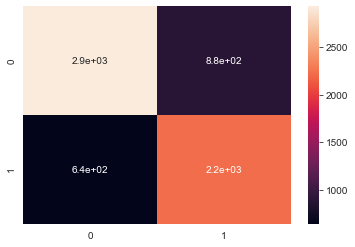

In [338]:
evaluation(gridsearch)

# Evaluating the Model
### `Accuracy of our model` 

Note:
   
  * The accuracy of our train model is 100%, which means our model classifies the train data 100% accurately.
  
    - This means that our model `overfit` a clear indication of `High Variance` a property of Decision Trees.
    
  * The accuracy of our test model is 68.9%, which means our model classifies the test data 68.6% accurately.
    
    - This means that our model `underfit` a clear indication of `low Bias` a property of Decision Trees.
    

  * The subsequent models aim to improve on the accuracy score of the training model by dealing with the overfit and underfit issue.

Log_loss
 * Decreasing the log loss above would indicate better model performance.

# Random Forest Classifier

The Model Train accuracy is: 0.771


The Model Test accuracy is: 0.772
Cross Validation Accuracy: 76.7848%
Log Loss: 7.883
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.77      0.81      0.79      3568
         1.0       0.77      0.72      0.75      3109

    accuracy                           0.77      6677
   macro avg       0.77      0.77      0.77      6677
weighted avg       0.77      0.77      0.77      6677



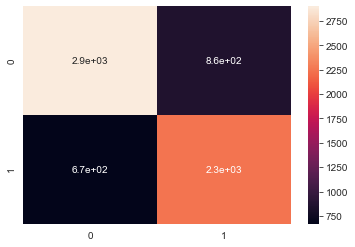

In [348]:
from sklearn.ensemble import RandomForestClassifier

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=0)


scaled_pipeline = Pipeline([('scaler' , StandardScaler()),
                            ('tree1', RandomForestClassifier())])

# setting basic parameter
grid = [{'tree1__n_estimators' : [len(range(1,100))],
         'tree1__criterion': ['gini', 'entropy'],
         'tree1__max_depth': [2,3,4,5]}]

gridsearch_rf = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=5)
evaluation(gridsearch_rf)


In [349]:
print(gridsearch_rf.best_params_)

{'tree1__criterion': 'gini', 'tree1__max_depth': 5, 'tree1__n_estimators': 99}


In [350]:
# Best score
print(gridsearch_rf.best_score_)

0.7672491263105343


In [351]:
print(gridsearch_rf.best_estimator_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree1',
                 RandomForestClassifier(max_depth=5, n_estimators=99))])


## Evaluating the model using our best parameters

The Model Train accuracy is: 0.771


The Model Test accuracy is: 0.770
Cross Validation Accuracy: 76.7549%
Log Loss: 7.951
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79      3568
         1.0       0.77      0.71      0.74      3109

    accuracy                           0.77      6677
   macro avg       0.77      0.77      0.77      6677
weighted avg       0.77      0.77      0.77      6677



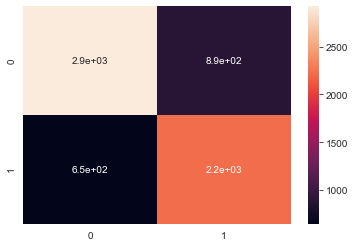

In [353]:
# setting basic parameter
grid = [{'tree1__n_estimators' : [99],
         'tree1__criterion': ['gini'],
         'tree1__max_depth': [5]}]

gridsearch_rf = GridSearchCV(estimator=scaled_pipeline, 
                          param_grid= grid,
                          scoring='accuracy', 
                          cv=5)
evaluation(gridsearch_rf)


# Gradient Boosting

The Model Train accuracy is: 0.793


The Model Test accuracy is: 0.787
Cross Validation Accuracy: 78.3625%
Log Loss: 7.340
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      3568
         1.0       0.78      0.75      0.77      3109

    accuracy                           0.79      6677
   macro avg       0.79      0.79      0.79      6677
weighted avg       0.79      0.79      0.79      6677



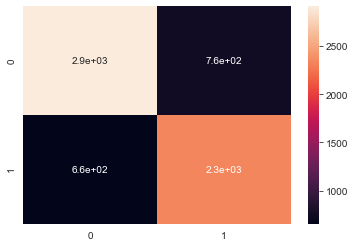

In [354]:
# Instantiate the GradientBoostingclassifier
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=0)


scaled_pipeline2 = Pipeline([('scaler' , StandardScaler()),
                            ('gradient', GradientBoostingClassifier())])

# setting basic parameter
grid2 = [{'gradient__loss' : ['log_loss', 'deviance'],
         'gradient__learning_rate': [0.1, 0.2, 0.3, 0.4,],
         'gradient__n_estimators': [len(range(1,120))]}]


gridsearch_gb = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=10)
evaluation(gridsearch_gb)




In [355]:
print(gridsearch_gb.best_params_)

{'gradient__learning_rate': 0.1, 'gradient__loss': 'deviance', 'gradient__n_estimators': 119}


## Evaluating the Gradient Boost model using our best parameters

The Model Train accuracy is: 0.793


The Model Test accuracy is: 0.787
Cross Validation Accuracy: 78.2976%
Log Loss: 7.340
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80      3568
         1.0       0.78      0.75      0.77      3109

    accuracy                           0.79      6677
   macro avg       0.79      0.79      0.79      6677
weighted avg       0.79      0.79      0.79      6677



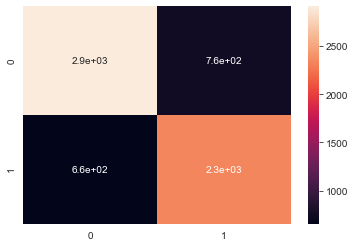

In [356]:
# setting basic parameter
grid2 = [{'gradient__loss' : ['deviance'],
         'gradient__learning_rate': [0.1],
         'gradient__n_estimators': [((119))]}]


gridsearch_gb = GridSearchCV(estimator=scaled_pipeline2, 
                          param_grid= grid2,
                          scoring='accuracy', 
                          cv=10)
evaluation(gridsearch_gb)

# AdaBoost

The Model Train accuracy is: 0.775


The Model Test accuracy is: 0.780
Cross Validation Accuracy: 77.4588%
Log Loss: 7.604
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      3568
         1.0       0.78      0.73      0.76      3109

    accuracy                           0.78      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.78      0.78      6677



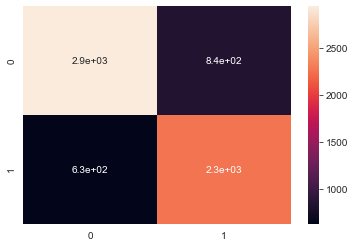

In [361]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size= 0.25, stratify=y, random_state=0)
from sklearn.ensemble import AdaBoostClassifier

scaled_pipeline3 = Pipeline([('scaler' , StandardScaler()),
                            ('ADA', AdaBoostClassifier())])

cv= 7
# setting basic parameter
ada = [{'ADA__learning_rate': [0.1, 0.2, 0.3, 0.4,],
         'ADA__n_estimators': [len(range(1,50))]}]

adaboost = GridSearchCV(estimator=scaled_pipeline3, 
                          param_grid= ada,
                          scoring='accuracy', 
                          cv=cv)

evaluation(adaboost)

In [360]:
print(adaboost.best_params_)

{'ADA__learning_rate': 0.4, 'ADA__n_estimators': 50}


# XGBOOST

The Model Train accuracy is: 0.779


The Model Test accuracy is: 0.781
Cross Validation Accuracy: 77.2491%
Log Loss: 7.578
******************************************************* 

******************************************************* 

              precision    recall  f1-score   support

         0.0       0.78      0.81      0.80      3568
         1.0       0.78      0.74      0.76      3109

    accuracy                           0.78      6677
   macro avg       0.78      0.78      0.78      6677
weighted avg       0.78      0.78      0.78      6677



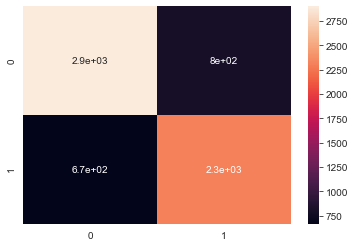

In [363]:
# Importing the necessary libraries:
import xgboost as xgb

# Creating an instance of the XGBoost classifier:
xgb.XGBClassifier()

#splitting the dataset into training and test sets:

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

cv = 5

#Creating a pipeline with scaling and XGBoost classifier:
scaled_pipeline4 = Pipeline([('scaler', StandardScaler()), ('xgb', xgb.XGBClassifier())])

# Setting up the parameter grid for hyperparameter tuning:
xgb = [{'xgb__eta': [0.1, 0.2, 0.3, 0.4],
         'xgb__gamma': [len(range(1, 50))],
         'xgb__max_depth': [len(range(1, 10))],
         'xgb__subsample': [len(range(0,1))],
         'xgb__booster': ['gbtree', 'dart']}]

# Performing grid search cross-validation:
xgboost = GridSearchCV(estimator=scaled_pipeline4, param_grid=xgb, scoring='accuracy', cv=cv)

# Fitting the training data and scoring the model:
evaluation(xgboost)


In [364]:
print(xgboost.best_params_)

{'xgb__booster': 'gbtree', 'xgb__eta': 0.4, 'xgb__gamma': 49, 'xgb__max_depth': 9, 'xgb__subsample': 1}


In [367]:
## Evaluating the XGBoost model using our best parameters

# CATBOOST

In [366]:
from catboost import CatBoostClassifier
